## Structure

<b>Project Overview</b><br>
This project aims to apply various unsupervised learning techniques such as clustering, association rule mining, anomaly detection, and dimensionality reduction to a retail transaction dataset. The goal is to derive meaningful insights that can help retailers optimize their operations, improve customer segmentation, and detect fraudulent transactions.

<b>Dataset Description</b><br>
The dataset used in this project is the "Online Retail" dataset, which is publicly available on the UCI Machine Learning Repository. It contains transactional data from a UK-based online retail store, including information about products, quantities, prices, and customer details. This dataset is ideal for exploring various unsupervised learning techniques due to its rich feature set and large size.

<b>Table of Contents</b>
1. Introduction
2. Data Loading and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Clustering Analysis
5. Association Rule Mining
6. Anomaly Detection
7. Dimensionality Reduction
8. Conclusion and Future Work

### 1. Introduction

This section provides an overview of the project, the objectives, and the importance of unsupervised learning in the context of retail transactions.

### 2. Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 3. Exploratory Data Analysis (EDA)

In [3]:
df.shape

(541909, 8)

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Drop the 'CustomerID' column
df = df.drop(columns=['CustomerID'])

# Fill missing values in the 'Description' column with an empty string
df['Description'] = df['Description'].fillna('')

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853


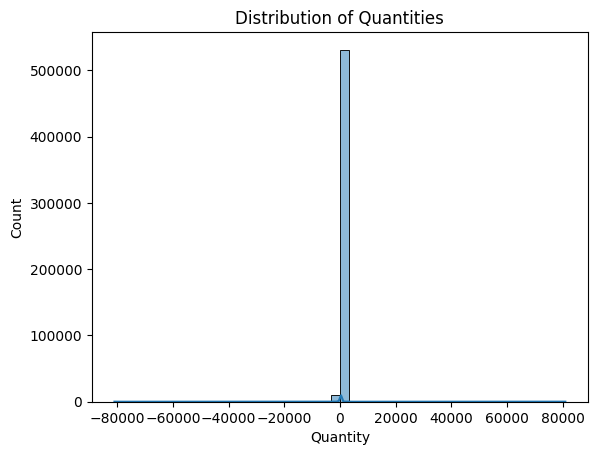

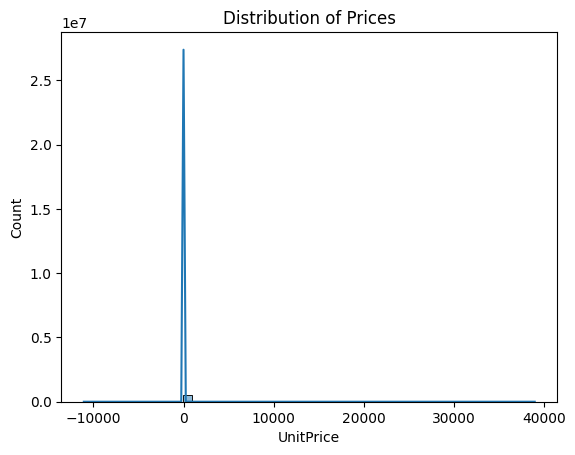

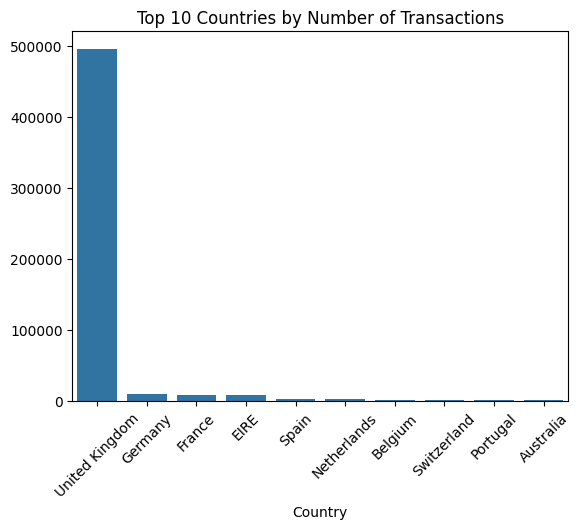

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Visualize the distribution of quantities
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantities')
plt.show()

# Visualize the distribution of prices
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.show()

# Visualize the top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 3D scatter plot of Quantity, UnitPrice, and TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
fig = px.scatter_3d(df, x='Quantity', y='UnitPrice', z='TotalPrice', color='Country')
fig.update_layout(title='3D Scatter Plot of Quantity, UnitPrice, and TotalPrice')
fig.show()

### 4. Clustering Analysis

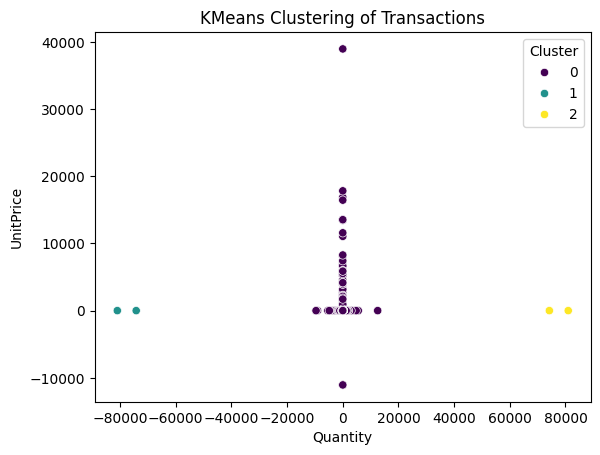

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Transactions')
plt.show()

### 5. Association Rule Mining

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the data for association rule mining
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket = basket.apply(lambda x: x.map(lambda y: 1 if y > 0 else 0))

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top 10 rules
rules.sort_values('lift', ascending=False).head(10)

: 